In [1]:
# import our libraries
import sys
import json
import pandas as pd
import seaborn as sb
import sys
import PyQt5.QtWidgets as qw
import PyQt5.QtCore as qc
import PyQt5.QtGui as qg
from spectra import spectra as spc
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


In [2]:
adata = sc.read_h5ad("../new_data.h5ad")

#with open("../spectra/annotations_2.json", "rb") as file:
     #annotations = json.load(file)

In [3]:
df = pd.DataFrame(adata.obsm["SPECTRA_cell_scores"])
df["cell_type"] = adata.obs["Bassez_cellType"].values
df = df.groupby("cell_type").mean()

Text(496.38199999999995, 0.5, 'Cell type')

C:\Users\Brian\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


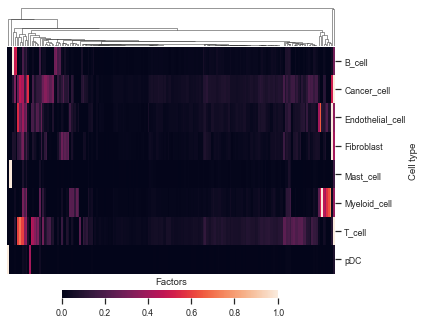

In [76]:
sb.set(font_scale = 0.8)

g = sb.clustermap(df, row_cluster = False, xticklabels = 0, col_cluster = True, dendrogram_ratio = (0, 0.15), colors_ratio = 5, cbar_pos = (.15,-0.05,.5,.03), cbar_kws = {"orientation":"horizontal"}, standard_scale = 0, linewidth = 0, figsize = (6,4))

g.ax_heatmap.set_xlabel("Factors")
g.ax_heatmap.set_ylabel("Cell type")

In [25]:
"Bassez_cellType" in adata.obs_keys()

True

In [10]:
len(adata.obsm["SPECTRA_cell_scores"][0,:])

196

In [32]:

factorNames = adata.uns["SPECTRA_markers"][0,:5]
print(" ".join(factorNames))


print(len(adata.uns["SPECTRA_markers"]))

A2M SELENOP SLC40A1 FCGBP MAFB
196


In [53]:
def colorByFactor():
    factorList = []
    for i in range(len(adata.uns["SPECTRA_markers"])):
        factorNames = ', '.join(adata.uns["SPECTRA_markers"][i][:5])
        factorString = "Factor " + str(i) + ": " + factorNames
        factorList.append(factorString)
    return factorList


In [54]:
colorByFactor()

['Factor 0: A2M, SELENOP, SLC40A1, FCGBP, MAFB',
 'Factor 1: MTRNR2L8, PPOX, MTRNR2L1, ALAD, BLVRB',
 'Factor 2: EGR1, NR4A1, GADD45B, KDM6B, RHOB',
 'Factor 3: COL1A1, COL3A1, SPARC, COL1A2, SFRP2',
 'Factor 4: SOCS1, TGFB1, IL12RB1, PTPN2, IFNAR1',
 'Factor 5: ACAA1, ACOT8, IDH3B, ACOX3, ACOX1',
 'Factor 6: GPAT4, AGPAT2, AGPAT5, FBXO34, AGPAT3',
 'Factor 7: ARNTL, CRY1, CRY2, CSNK1E, DGKE',
 'Factor 8: GUSB, NOL8, RABEPK, ACACA, METTL18',
 'Factor 9: DUSP2, DNAJB1, DUSP1, CXCR4, RGS1',
 'Factor 10: HLA-DOB, HLA-DPA1, CD79B, LTB, SELL',
 'Factor 11: RAB3GAP2, UFL1, KAT5, SCOC, LARP1',
 'Factor 12: ADH5, TET2, C12orf75, TET1, KLF2',
 'Factor 13: COMTD1, COMT, SULT1A1, GOT2, GSTZ1',
 'Factor 14: FBXO7, HUWE1, CISD2, ATG3, USP36',
 'Factor 15: HSPA1A, HSPA1B, DNAJB1, HSPH1, HSP90AA1',
 'Factor 16: TRIM33, DIAPH2, SLC35B4, SLC35C1, PRKAB2',
 'Factor 17: XRCC5, XRCC6, NFAT5, ARHGEF2, ANXA7',
 'Factor 18: C1GALT1, GALNT11, GALNT2, GALNT6, GALNT7',
 'Factor 19: SLC25A3, NAXE, CACYBP, OSTC, 